<a href="https://colab.research.google.com/github/giintok/sideproject_steam/blob/main/%EC%82%AC%EC%9D%B4%EB%93%9C_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%951%EC%9D%BC%EC%B0%A8_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표 2024-02-01

1. 시각화 할 데이터 정제 작업

    
    games.csv랑 app_id를에서의 gmae_id를 기준으로 games.csv파일에만 있는 game_id 약 2336개 기준으로 시각화 돌입

2. 전처리 데이터를 보면서 컬럼 거른거 말고 추가로 해야할 거 찾아보기

3. 데이터 분석 사전에 회의한 디코 8개 기준으로 각자 시각화 및 분석을 해보고 토의 해보기



---

1. 캐글 에서 가지고 온 games.csv 데이터 1차 정제 작업


    *   중복 값
    *   결측치
    *   이상값
    *   실제 데이터들을 보면서 이상한거 있는지 최종 체크까지만

이 후 각 시각화 및 분석을 보면서 게임을 추릴 예정

---
출처 : https://www.kaggle.com/datasets/fronkongames/steam-games-dataset 2024-01-18일에 구함


In [1]:
import pandas as pd
import os

In [2]:
#저장할 구글드라이브 경로
output_dir = '/content/drive/MyDrive/sidepro/'

In [3]:
# 게임 원본 데이터 85102 rows × 39 columns
games_origin = pd.read_csv('/content/drive/MyDrive/sidepro/games.csv')
games_origin

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85097,2669080,Mannerheim's Saloon Car,"Jan 2, 2024",0 - 0,0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,"['English', 'Finnish']",...,0,0,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
85098,2736910,Beer Run,"Jan 3, 2024",0 - 0,0,0,0.00,0,Beer Run is an Indie game created to steal bee...,['English'],...,0,0,0,955 Games,955 Games,Single-player,"Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
85099,2743220,My Friend The Spider,"Jan 4, 2024",0 - 0,0,0,0.00,0,A small 'horror' narrative game about isolatio...,['English'],...,0,0,0,MCA,MCA,Single-player,"Adventure,Simulation",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
85100,2293130,Path of Survivors,"Jan 8, 2024",0 - 0,0,0,3.99,0,Path of Survivors is a multi-class auto-battle...,['English'],...,0,0,0,Limited Input,Limited Input,"Single-player,Steam Achievements,Partial Contr...","Action,Casual,Indie,RPG,Simulation",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [4]:
# 2024-01-18일자 스팀 최고인기제품 4016개의 게임 id만 가지고 온 데이터 4016개
gameid_origin = pd.read_csv('/content/drive/MyDrive/sidepro/app_ids.csv')
len(gameid_origin)

4016

In [5]:
# 중복 체크
## any() 하나라도 true가 있으면 true를 반환 즉 불리언 시퀀스에서 어떤 값이라도 참인지 확인할 때 사용
gameid_origin['app_id'].duplicated().any()

False

---
수업중에는 sum()으로 0인지 아닌지를 확인 하였음
```
gameid_origin['app_id'].duplicated().sum()
```
---


In [6]:
# 결측치 체크
gameid_origin['app_id'].isnull().any()
#gameid_origin['app_id'].isna().any() 같은 코드

False

In [7]:
#gameid_origin안에 있는 app_id열의 값이 games_origin 안에 있는 열에 속하는 행만 저장
overlap_app_ids = games_origin[games_origin['AppID'].isin(gameid_origin['app_id'])]

#혹시 몰라서 뽑은 app_id만 따로 미리 저장
overlap_app_ids_df = pd.DataFrame({'AppID': overlap_app_ids['AppID']})
overlap_app_ids_df.to_csv(os.path.join(output_dir, 'overlap_app_ids.csv'), index=False)

print("겹치는 app_id 개수:", len(overlap_app_ids))
print("겹치는 app_id를 저장한 데이터프레임:\n", overlap_app_ids_df)

겹치는 app_id 개수: 2260
겹치는 app_id를 저장한 데이터프레임:
          AppID
14     1454010
39      262150
44      897820
93     1066890
96      457140
...        ...
84943  2683490
85036  2674190
85064  2459870
85078  2645600
85085  2000770

[2260 rows x 1 columns]


In [8]:
overlap_app_ids

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
14,1454010,Diary of Lucie,"Nov 25, 2020",0 - 20000,3,0,12.99,0,Diary of Lucie is action-roguelite game made w...,"['English', 'Korean']",...,0,0,0,Parange Project,Parange Project,"Single-player,Partial Controller Support,Steam...","Action,Adventure,Indie,RPG,Strategy,Early Access","Action Roguelike,Action,Rogue-lite,RPGMaker,My...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
39,262150,Vanguard Princess,"Mar 3, 2014",200000 - 500000,1,0,2.49,7,Government experiments on a young girl trigger...,['English'],...,0,244,0,Tomoaki Sugeno,eigoMANGA,"Single-player,Multi-player,PvP,Shared/Split Sc...","Action,Casual,Indie","Anime,Fighting,2D Fighter,Indie,Female Protago...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
44,897820,Reigns: Game of Thrones,"Oct 18, 2018",50000 - 100000,2,0,3.99,0,Reigns: Game of Thrones is the heir to the awa...,"['English', 'French', 'German', 'Spanish - Spa...",...,0,76,0,Nerial,Devolver Digital,"Single-player,Steam Achievements,Full controll...","Adventure,Indie,RPG","RPG,Indie,Card Game,Adventure,Choices Matter,2...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
93,1066890,Automobilista 2,"Jun 30, 2020",200000 - 500000,358,0,23.99,11,Automobilista 2 is the culmination of a projec...,"['English', 'French', 'German', 'Spanish - Spa...",...,24,2606,24,Reiza Studios,Reiza Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
96,457140,Oxygen Not Included,"Jul 30, 2019",2000000 - 5000000,7507,0,24.99,2,In the space-colony simulation game Oxygen Not...,"['English', 'Simplified Chinese', 'Korean', 'R...",...,1441,1003,2777,Klei Entertainment,Klei Entertainment,"Single-player,Steam Trading Cards","Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84943,2683490,Glimpse,"Jan 6, 2024",0 - 0,0,0,2.39,0,'Glimpse' takes you on a journey through the m...,['English'],...,0,0,0,"Melanzue,Zofraire",Melanzue,Single-player,Indie,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
85036,2674190,Akai Onna,"Jan 4, 2024",0 - 20000,0,0,2.54,0,Akai Onna | 赤い女 is a psychological J-horror ga...,"['English', 'Japanese']",...,0,0,0,Yamoto,Yamoto,Single-player,"Casual,Indie","Walking Simulator,Casual,First-Person,3D,Horro...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
85064,2459870,Drop Doll,"Jan 5, 2024",0 - 20000,0,0,1.79,1,Game Introduction: 'Drop Doll' is a casual puz...,"['Simplified Chinese', 'English', 'Japanese', ...",...,0,0,0,No.25,No.25,Single-player,"Casual,Early Access","Mature,Sexual Content,Casual,Relaxing,NSFW,2D,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
85078,2645600,The Holyburn Witches,"Jan 5, 2024",0 - 20000,0,0,2.99,0,"In the once tranquil village of Holyburn, Main...","['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Moolion,Moolion,Single-player,"Casual,Indie,Early Access","Casual,Adventure,Point & Click,Exploration,3D,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [9]:
#회의 때 추린 분석시 사용할 대표 16개 컬럼들 (전체 39개에서 16개로 줄임)
selected_columns_games = ['AppID', 'Name', 'Peak CCU', 'Required age', 'Price', 'DLC count',
                          'Supported languages', 'Metacritic score', 'Positive', 'Negative',
                          'Average playtime forever', 'Median playtime forever','Developers',
                          'Publishers', 'Genres', 'Tags'
                          ]
games_filter = overlap_app_ids[selected_columns_games]
games_filter

,AppID,Name,Peak CCU,Required age,Price,DLC count,Supported languages,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags
14,1454010,Diary of Lucie,3,0,12.99,0,"['English', 'Korean']",0,100,5,0,0,Parange Project,Parange Project,"Action,Adventure,Indie,RPG,Strategy,Early Access","Action Roguelike,Action,Rogue-lite,RPGMaker,My..."
39,262150,Vanguard Princess,1,0,2.49,7,['English'],0,2014,841,425,244,Tomoaki Sugeno,eigoMANGA,"Action,Casual,Indie","Anime,Fighting,2D Fighter,Indie,Female Protago..."
44,897820,Reigns: Game of Thrones,2,0,3.99,0,"['English', 'French', 'German', 'Spanish - Spa...",84,698,203,83,76,Nerial,Devolver Digital,"Adventure,Indie,RPG","RPG,Indie,Card Game,Adventure,Choices Matter,2..."
93,1066890,Automobilista 2,358,0,23.99,11,"['English', 'French', 'German', 'Spanish - Spa...",0,4278,491,1880,2606,Reiza Studios,Reiza Studios,"Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri..."
96,457140,Oxygen Not Included,7507,0,24.99,2,"['English', 'Simplified Chinese', 'Korean', 'R...",86,82902,3014,3574,1003,Klei Entertainment,Klei Entertainment,"Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84943,2683490,Glimpse,0,0,2.39,0,['English'],0,0,0,0,0,"Melanzue,Zofraire",Melanzue,Indie,NaN
85036,2674190,Akai Onna,0,0,2.54,0,"['English', 'Japanese']",0,19,2,0,0,Yamoto,Yamoto,"Casual,Indie","Walking Simulator,Casual,First-Person,3D,Horro..."
85064,2459870,Drop Doll,0,0,1.79,1,"['Simplified Chinese', 'English', 'Japanese', ...",0,24,4,0,0,No.25,No.25,"Casual,Early Access","Mature,Sexual Content,Casual,Relaxing,NSFW,2D,..."
85078,2645600,The Holyburn Witches,0,0,2.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",0,1,3,0,0,Moolion,Moolion,"Casual,Indie,Early Access","Casual,Adventure,Point & Click,Exploration,3D,..."


In [10]:
games_filter.describe()
#동시접속자수 peak ccu가 0인게 이상하다고 느낌 플레이타임도 0인게 의심되었으나, 게임을 사고 안하는 케이스도 있기 때문에 나온 수치

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever
count,2.260000e+03,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2.260000e+03,2260.000000,2260.000000,2260.000000
mean,1.234761e+06,3939.757965,1.444248,15.902066,3.239823,18.021239,2.191286e+04,3106.732743,871.987611,532.575664
std,7.197260e+05,32088.043107,4.707936,15.136550,22.428737,33.337549,1.451420e+05,27348.908013,2544.340799,2802.031310
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6.116275e+05,2.000000,0.000000,4.490000,0.000000,0.000000,8.500000e+01,11.000000,0.000000,0.000000
50%,1.190065e+06,44.500000,0.000000,12.990000,0.000000,0.000000,8.620000e+02,127.000000,164.500000,140.000000
75%,1.808108e+06,595.250000,0.000000,19.990000,1.000000,0.000000,6.911500e+03,842.250000,737.000000,499.000000
max,2.739500e+06,872138.000000,18.000000,149.990000,678.000000,97.000000,5.764420e+06,895978.000000,64973.000000,114016.000000


In [11]:
#Peak CCU 0인게 이상하니 확인 413개의 게임이 확인됨
zero_peak_ccu_data = games_filter[games_filter['Peak CCU'] == 0]
zero_peak_ccu_data

,AppID,Name,Peak CCU,Required age,Price,DLC count,Supported languages,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags
164,1776800,KarmaCrown,0,0,2.99,0,['English'],0,2,0,0,0,Furyface,Furyface,"Action,Casual,Indie","Action,Rogue-like,Shooter,Arena Shooter,Bullet..."
898,536430,The Revenge of Johnny Bonasera: Episode 1,0,0,3.99,0,"['English', 'Spanish - Spain', 'Russian', 'Ukr...",0,49,8,0,0,Rafael García,Rafael García,"Adventure,Indie","Adventure,Indie,Point & Click,Cartoony,Comedy,2D"
1194,1677180,Neko Hacker Plus,0,0,2.99,2,['English'],0,30,10,0,0,Axyos Games,Axyos Games,"Casual,Indie,Simulation","Nudity,NSFW,Cute,Puzzle,Anime,Casual,Sexual Co..."
1219,1577320,Somewhere in the Shadow,0,0,2.99,0,['English'],0,351,75,0,0,"Alexander Simashkevich,Nikolay Kulesh",Alexander Simashkevich,"Adventure,Indie,Massively Multiplayer","Horror,Online Co-Op,Co-op,Adventure,Multiplaye..."
1361,1093330,Conscious Existence - A Journey Within,0,0,1.99,0,['English'],0,471,61,0,0,Marc Zimmermann,EpicScapes,Indie,"Indie,Atmospheric,VR,Relaxing,Cinematic,Epic,3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84926,2739500,Merge Circus,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Ar...",0,0,0,0,0,Felix Fatum Studio,Felix Fatum Studio,"Casual,Indie",NaN
84943,2683490,Glimpse,0,0,2.39,0,['English'],0,0,0,0,0,"Melanzue,Zofraire",Melanzue,Indie,NaN
85036,2674190,Akai Onna,0,0,2.54,0,"['English', 'Japanese']",0,19,2,0,0,Yamoto,Yamoto,"Casual,Indie","Walking Simulator,Casual,First-Person,3D,Horro..."
85064,2459870,Drop Doll,0,0,1.79,1,"['Simplified Chinese', 'English', 'Japanese', ...",0,24,4,0,0,No.25,No.25,"Casual,Early Access","Mature,Sexual Content,Casual,Relaxing,NSFW,2D,..."


In [12]:
#이 중 솔로플레이 게임이나, 인기 없는 게임의 경우 0일 가능성을 생각 게임사가 정한 장르에 멀티플레이가 들어간 게임을 확인 -> 18개 확인
multiplayer_data = zero_peak_ccu_data[zero_peak_ccu_data['Genres'].str.contains('Multiplayer')]
len(multiplayer_data)

18

In [13]:
multiplayer_data

,AppID,Name,Peak CCU,Required age,Price,DLC count,Supported languages,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags
1219,1577320,Somewhere in the Shadow,0,0,2.99,0,['English'],0,351,75,0,0,"Alexander Simashkevich,Nikolay Kulesh",Alexander Simashkevich,"Adventure,Indie,Massively Multiplayer","Horror,Online Co-Op,Co-op,Adventure,Multiplaye..."
13344,1022780,Animal Fight Club,0,0,3.99,1,"['English', 'Italian', 'Spanish - Spain', 'Tra...",0,220,48,146,146,Marco Amadei,Corvostudio di Amadei Marco,"Action,Adventure,Indie,Massively Multiplayer,S...","Action,Indie,Simulation,Strategy,Massively Mul..."
29148,1827180,Toram Online,0,0,0.00,0,"['English', 'Thai', 'Traditional Chinese', 'Ja...",0,0,0,0,0,"Asobimo, Inc.","Asobimo, Inc.","Free to Play,Massively Multiplayer,RPG",NaN
37561,1590320,Bro Falls,0,0,0.00,0,"['English', 'Hungarian', 'Italian', 'Portugues...",0,0,0,0,0,Boros Bros,Boros Bros,"Action,Casual,Free to Play,Indie,Massively Mul...",NaN
53371,1755920,Infinite Lagrange,0,0,0.00,0,"['English', 'French', 'German', 'Spanish - Spa...",0,0,0,0,0,NetEase Games,NetEase Games,"Massively Multiplayer,Simulation,Strategy",NaN
55470,1568590,Goose Goose Duck,0,0,0.00,0,"['English', 'French', 'German', 'Japanese', 'K...",0,0,0,0,0,"Gaggle Studios, Inc.","Gaggle Studios, Inc.","Casual,Free to Play,Indie,Massively Multiplaye...",NaN
60876,1939350,Hide & Chick,0,0,4.99,0,"['English', 'Korean']",0,9,8,0,0,Jisung Choi,Jisung Choi,"Casual,Indie,Massively Multiplayer,Early Access","Multiplayer,Party Game,Casual,Battle Royale,St..."
61919,1797880,Lost Light,0,0,0.00,0,"['English', 'German', 'Spanish - Spain', 'Russ...",0,0,0,0,0,NetEase Games,NetEase Games,"Action,Free to Play,Massively Multiplayer,Earl...",NaN
63638,1826980,FreestyleFootball R,0,0,0.00,0,['English'],0,0,0,0,0,JOYCITY Corporation,"HOGA INFORMATION TECHNOLOGY CO.,LTD","Action,Casual,Massively Multiplayer,RPG,Sports",NaN
67117,1818450,STALCRAFT,0,0,0.00,0,"['English', 'Russian']",0,0,0,0,0,EXBO,EXBO,"Action,Adventure,Massively Multiplayer,RPG",NaN


---
문제점

스팀 게임 - 커뮤니티허브를 보면 동시접속자 수가 나오는데 분명 동시 접속자 수가 있다.

즉 데이터가 오류 아니면 데이터를 수집시에는 0명일 가능성이 있다고 생각합니다.

우선적으로 다른 결측치나 이상치부터 삭제 해보고 다시 회의를 해봐야 할 듯

---

In [14]:
#결측치 확인
games_filter.isnull().any()

AppID                       False
Name                        False
Peak CCU                    False
Required age                False
Price                       False
DLC count                   False
Supported languages         False
Metacritic score            False
Positive                    False
Negative                    False
Average playtime forever    False
Median playtime forever     False
Developers                   True
Publishers                   True
Genres                       True
Tags                         True
dtype: bool

In [15]:
null_values = games_filter.columns[games_filter.isnull().any()]
for column in null_values:
    print(f"{column}: {games_filter[column].isnull().sum()} 개")

Developers: 1 개
Publishers: 6 개
Genres: 2 개
Tags: 171 개


In [16]:
games_filter[games_filter['Genres'].isnull()]
#게임 책이랑, 고전 소닉 게임이 장르가 없는걸로 나옴

,AppID,Name,Peak CCU,Required age,Price,DLC count,Supported languages,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags
1346,71250,Sonic Adventure DX,115,0,7.99,0,"['English', 'French', 'German', 'Japanese', 'S...",0,9673,1097,360,126,SEGA,SEGA,NaN,"Platformer,3D Platformer,Great Soundtrack,Adve..."
47231,104600,Portal 2 - The Final Hours,1,0,1.99,0,['English'],0,488,128,49,31,Geoff Keighley,Geoff Keighley,NaN,"Documentary,Story Rich,Action,Puzzle,Adventure..."


---
회의 결과 : null값이 있는 게임들 몇 개 확인 해본 결과 다 날리기로 결정

이유 : 이는 게임 수를 줄이기 위한 전처리고 나중에 리뷰랑도 연결해볼려고하는데 리뷰 수가 적은 게임들이기 때문에

---

In [17]:
# null 값이 있는 행을 제거 2260개에서 2082개로 178개의 열이 삭제 됨
games_filter = games_filter.dropna()

print('null값 후', games_filter.shape)

null값 후 (2082, 16)


In [18]:
#위의 이상 값 한번 더 확인 18개로 동일 ..
multiplayer_data = zero_peak_ccu_data[zero_peak_ccu_data['Genres'].str.contains('Multiplayer')]
len(multiplayer_data)

18

In [19]:
#중복 자체는 없는 걸로 나옴
games_filter[games_filter.duplicated()]

,AppID,Name,Peak CCU,Required age,Price,DLC count,Supported languages,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags


In [20]:
#이상치
from scipy import stats

# Z-score를 계산하여 이상치 찾기
z_scores = stats.zscore(games_filter.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

outlier_data = games_filter[outliers]
print(outlier_data)

Empty DataFrame
Columns: [AppID, Name, Peak CCU, Required age, Price, DLC count, Supported languages, Metacritic score, Positive, Negative, Average playtime forever, Median playtime forever, Developers, Publishers, Genres, Tags]
Index: []



Z-score는 정규분포에서 특정 데이터 포인트가 평균에서 얼마나 떨어져 있는지를 표준 편차 단위로 나타내는 통계적 측도입니다. 이는 이상치를 탐지하는데 사용될 수 있습니다. Z-score를 계산하려면 다음과 같은 단계를 거칩니다:

    평균과 표준 편차 계산: 데이터의 평균과 표준 편차를 계산합니다.

    Z-score 계산: 각 데이터 포인트에 대해 Z-score를 계산합니다.
    Z-score는 데이터 포인트와 평균 간의 차이를 표준 편차로 나눈 값입니다.
보통 Z-score의 절댓값이 특정 임계값을 초과하는 경우 해당 데이터 포인트를 이상치로 간주합니다. 일반적으로, Z-score가 3보다 크거나 -3보다 작으면 이상치로 간주됩니

In [21]:
games_filter.dtypes

AppID                         int64
Name                         object
Peak CCU                      int64
Required age                  int64
Price                       float64
DLC count                     int64
Supported languages          object
Metacritic score              int64
Positive                      int64
Negative                      int64
Average playtime forever      int64
Median playtime forever       int64
Developers                   object
Publishers                   object
Genres                       object
Tags                         object
dtype: object

---
연령 라벨링

---

In [24]:
games_filter['Required age'].value_counts()

0     1888
17     155
18      17
13      12
16       6
12       2
10       1
6        1
Name: Required age, dtype: int64

In [25]:
# 새로운 라벨링을 저장할 컬럼 추가
games_filter['Age_Category'] = '전체이용가'
games_filter.loc[(games_filter['Required age'] >= 1) & (games_filter['Required age'] <= 13), 'Age_Category'] = '어린이'
games_filter.loc[(games_filter['Required age'] >= 14) & (games_filter['Required age'] <= 17), 'Age_Category'] = '청소년'
games_filter.loc[(games_filter['Required age'] >= 18), 'Age_Category'] = '성인'

#기존 연령 컬럼 삭제
games_filter = games_filter.drop(columns=['Required age'])

<ipython-input-25-0d89f27ef568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_filter['Age_Category'] = '전체이용가'


In [27]:
#맞게 잘 분류가 됨 확인
games_filter['Age_Category'].value_counts()

전체이용가    1888
청소년       161
성인         17
어린이        16
Name: Age_Category, dtype: int64

In [28]:
#1차 전처리한 자료를 이제 분석을 위해서 저장
games_filter.to_csv(os.path.join(output_dir, 'games_final.csv'), index=False)

---
○ 최고 동시 접속자 수(동시 접속자 수 몇 명이상) 높은거나 가격이 5만원이상의 게임들(AAA급 게임이 보통 60달러 기준) 게임들을 추림

    º 해당 기준을 충족하는 탑 10(예시) 게임에 대해 메타스코어와 긍정, 부정 평가의 리뷰 비율을 비교
    º 전문가 평가인 메타스코어와 사용자 리뷰간의 차이를 시각화 해보는 방법

---

In [31]:
games_df01 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')
games_df01.shape

(2082, 16)

In [32]:
games_df01.columns

Index(['AppID', 'Name', 'Peak CCU', 'Price', 'DLC count',
       'Supported languages', 'Metacritic score', 'Positive', 'Negative',
       'Average playtime forever', 'Median playtime forever', 'Developers',
       'Publishers', 'Genres', 'Tags', 'Age_Category'],
      dtype='object')

In [33]:
#분석 시 사용한 컬럼 + 나중에 보여줄 코드 정도를 빼고 날려버림
selected_column01 = ['AppID', 'Name', 'Peak CCU', 'Price', 'Metacritic score', 'Positive', 'Negative',
                     'Developers', 'Publishers','Genres', 'Tags', 'Age_Category']
analyze_game01 = games_df01[selected_column01]

In [34]:
#메타스코어랑 유저같의 평가를 비교하기 위해서 메타스코어가 0인 건 날리기로 결정
analyze_game01['Metacritic score'] == 0

0        True
1        True
2       False
3        True
4       False
        ...  
2077     True
2078     True
2079     True
2080     True
2081     True
Name: Metacritic score, Length: 2082, dtype: bool

In [35]:
analyze_game01 = analyze_game01[analyze_game01['Metacritic score'] != 0]

In [36]:
(analyze_game01['Positive'] == 0).any()

False

In [37]:
(analyze_game01['Negative'] == 0).any()

False

In [38]:
(analyze_game01['Metacritic score'] == 0).any()

False

In [39]:
#이건 무료게임이라 0이 있음
 (analyze_game01['Price'] == 0).any()

True

In [40]:
#메타스코어 0인것을 빼니 516개로 데이터가 크게 줄음
analyze_game01

,AppID,Name,Peak CCU,Price,Metacritic score,Positive,Negative,Developers,Publishers,Genres,Tags,Age_Category
2,897820,Reigns: Game of Thrones,2,3.99,84,698,203,Nerial,Devolver Digital,"Adventure,Indie,RPG","RPG,Indie,Card Game,Adventure,Choices Matter,2...",전체이용가
4,457140,Oxygen Not Included,7507,24.99,86,82902,3014,Klei Entertainment,Klei Entertainment,"Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man...",전체이용가
9,975470,Silver Chains,2,24.99,51,420,147,Cracked Heads Games,Headup,"Adventure,Indie","Horror,Adventure,Indie,Psychological Horror,Fi...",전체이용가
10,286750,Zoo Empire,9,6.99,59,98,32,Enlight Software Limited,"Retroism,Enlight Software Limited","Casual,Simulation,Strategy","Simulation,Strategy,Casual,Management",전체이용가
11,237430,Expeditions: Conquistador,7,19.99,77,1079,268,Logic Artists,THQ Nordic,"Indie,RPG,Strategy","RPG,Strategy,Turn-Based,Indie,Turn-Based Strat...",전체이용가
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1012570,Knuckle Sandwich,84,19.99,74,231,31,Andy Brophy,"Andy Brophy,SUPERHOT PRESENTS","Adventure,Indie,RPG","Story Rich,Pixel Graphics,Minigames,Turn-Based...",전체이용가
2017,1931770,Chants of Sennaar,492,19.99,85,6484,82,Rundisc,Focus Entertainment,"Adventure,Indie","Adventure,Puzzle,Singleplayer,Colorful,Indie,A...",전체이용가
2039,1497440,COCOON,84,24.99,88,2349,70,Geometric Interactive,Annapurna Interactive,"Adventure,Indie","Adventure,Puzzle,Exploration,Stylized,3D,Atmos...",전체이용가
2047,2140020,Stronghold: Definitive Edition,1894,14.99,82,4564,651,FireFly Studios,FireFly Studios,"Simulation,Strategy","City Builder,Real Time Tactics,Sandbox,Buildin...",전체이용가


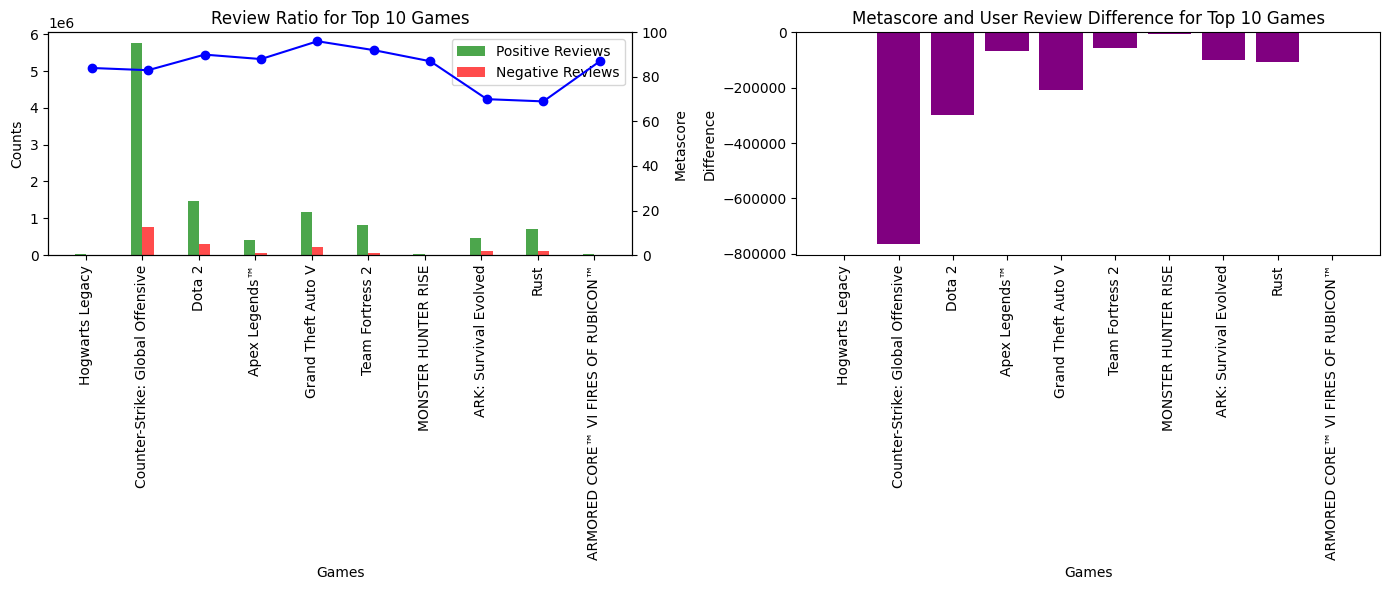

In [42]:
import matplotlib.pyplot as plt
import numpy as np

median_concurrent_players = np.median(analyze_game01['Peak CCU'])
YOUR_MIN_CONCURRENT_PLAYERS = median_concurrent_players * 0.25
#25퍼 이상

# 최고 동시 접속자 수가 어느 정도 이상인 게임 또는 가격이 $50 이상인 게임 추출
filtered_games = analyze_game01[(analyze_game01['Peak CCU'] >= YOUR_MIN_CONCURRENT_PLAYERS) |
                                (analyze_game01['Price'] >= 50)]

# 최상위 10개 게임 선택
top_10_games = filtered_games.nlargest(10, 'Peak CCU')

# 메타스코어와 리뷰 비율 분석
plt.figure(figsize=(14, 6))

# 메타스코어 및 리뷰 비율 시각화
plt.subplot(1, 2, 1)
bar_width = 0.2
index = np.arange(len(top_10_games['Name']))
plt.bar(index - bar_width, top_10_games['Positive'], label='Positive Reviews', color='green', width=bar_width, alpha=0.7)
plt.bar(index, top_10_games['Negative'], label='Negative Reviews', color='red', width=bar_width, alpha=0.7)
plt.xlabel('Games')
plt.ylabel('Counts')
plt.title('Review Ratio for Top 10 Games')
plt.xticks(index - bar_width/2, top_10_games['Name'], rotation=90)
plt.legend()

# 메타스코어 선그래프
plt.subplot(1, 2, 1)
ax2 = plt.gca().twinx()
ax2.plot(index, top_10_games['Metacritic score'], color='blue', marker='o', label='Metascore')
ax2.set_ylabel('Metascore')
ax2.set_ylim([0, 100])

# 전문가 평가와 사용자 리뷰 간의 차이 시각화
plt.subplot(1, 2, 2)
top_10_games['Metacritic-User Difference'] = top_10_games['Metacritic score'] - (top_10_games['Negative'])
plt.bar(top_10_games['Name'], top_10_games['Metacritic-User Difference'], color='purple')
plt.xlabel('Games')
plt.ylabel('Difference')
plt.title('Metascore and User Review Difference for Top 10 Games')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [43]:
top_10_games[['Name', 'Metacritic score', 'Positive', 'Negative', 'Metacritic-User Difference']]

,Name,Metacritic score,Positive,Negative,Metacritic-User Difference
1665,Hogwarts Legacy,84,33521,2000,-1916
1125,Counter-Strike: Global Offensive,83,5764420,766677,-766594
462,Dota 2,90,1477153,300437,-300347
21,Apex Legends™,88,415524,66608,-66520
1387,Grand Theft Auto V,96,1171197,210154,-210058
750,Team Fortress 2,92,823693,56683,-56591
942,MONSTER HUNTER RISE,87,37494,5799,-5712
167,ARK: Survival Evolved,70,461567,98701,-98631
851,Rust,69,703687,108223,-108154
1852,ARMORED CORE™ VI FIRES OF RUBICON™,87,23716,4194,-4107


---
문제점

    전문가와 유저간의 평가를 비교하는데 기준이 명확하지가 않음 : 점수랑 평가 수 이기 때문에 크기가 차이가 많이남

해결책

    1. 상대적인 비율 사용
    2. 평균화된 차이
    3. 평가를 정규화를 한번 해보기

---

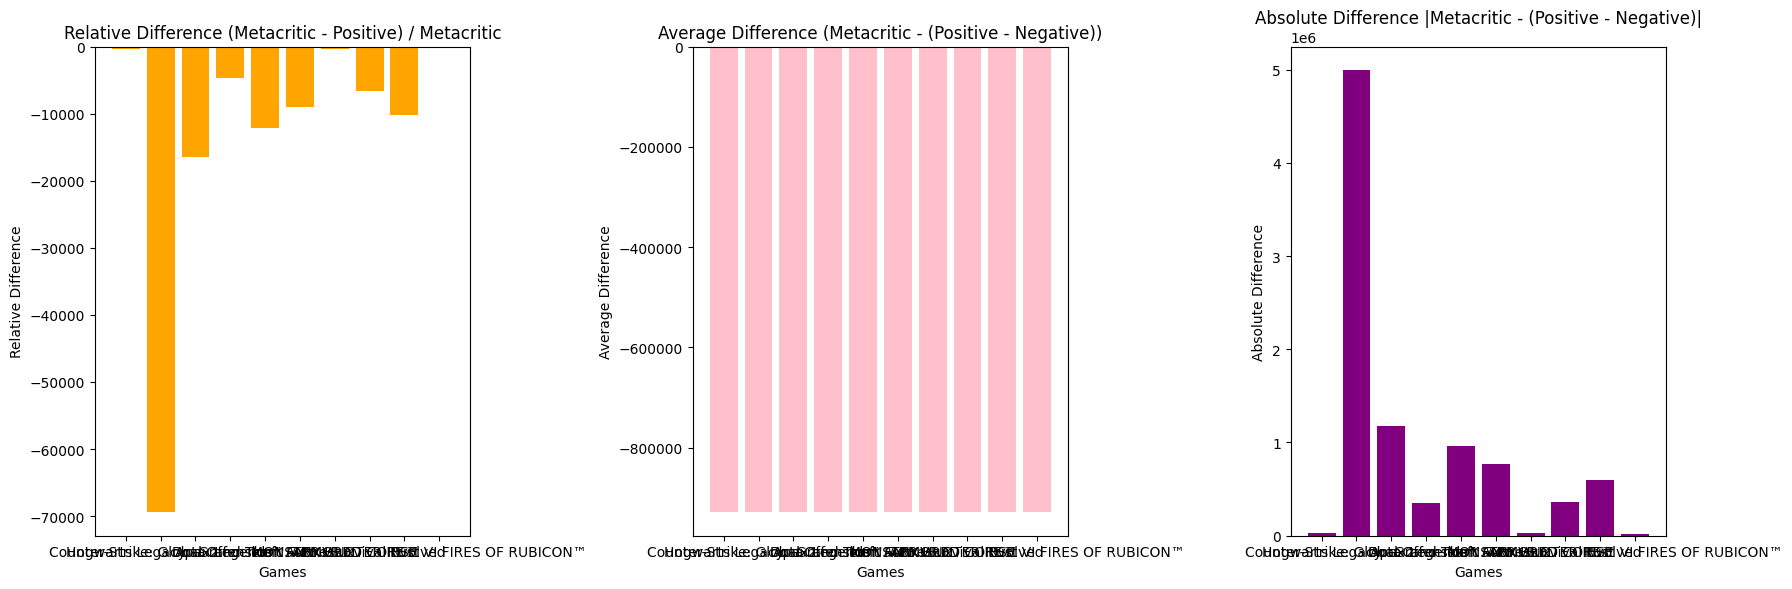

In [44]:
# 전문가 평가와 사용자 리뷰 간의 차이 시각화
plt.figure(figsize=(18, 6))

# 1. 상대적 비율 사용
plt.subplot(1, 3, 1)
relative_difference = (top_10_games['Metacritic score'] - top_10_games['Positive']) / top_10_games['Metacritic score']
plt.bar(top_10_games['Name'], relative_difference, color='orange')
plt.xlabel('Games')
plt.ylabel('Relative Difference')
plt.title('Relative Difference (Metacritic - Positive) / Metacritic')

# 2. 평균화된 차이
plt.subplot(1, 3, 2)
average_difference = np.mean(top_10_games['Metacritic score'] - (top_10_games['Positive'] - top_10_games['Negative']))
plt.bar(top_10_games['Name'], average_difference * np.ones(len(top_10_games)), color='pink')
plt.xlabel('Games')
plt.ylabel('Average Difference')
plt.title('Average Difference (Metacritic - (Positive - Negative))')

# 3. 절대값 사용
plt.subplot(1, 3, 3)
absolute_difference = np.abs(top_10_games['Metacritic score'] - (top_10_games['Positive'] - top_10_games['Negative']))
plt.bar(top_10_games['Name'], absolute_difference, color='purple')
plt.xlabel('Games')
plt.ylabel('Absolute Difference')
plt.title('Absolute Difference |Metacritic - (Positive - Negative)|')

plt.tight_layout()
plt.show()